# House Pricing

- This is simple project taken up to understand the fullstack developers 
- Using Linear Regression to predict the price of an house based on some features.
- The data set is taken from `sklearn` and the location selected is **Boston**

# Import important packages

In [316]:
import pandas as pd
import sklearn
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn
import pickle

# load the data set

In [218]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/y3/gkk69rb15yq9_d5mhj2rp8400000gn/T/ipykernel_95162/16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [219]:
# create a Data frame from the avaialble da
features = ['CRIM',  'ZN'  , 'INDUS'   , 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'RAD' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT']

boston_df = pd.DataFrame(data, columns = features)

In [220]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [221]:
# data cleaning
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [222]:
# output feature - price 
boston_df['PRICE'] = target

In [223]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [226]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: xlabel='LSTAT', ylabel='PRICE'>

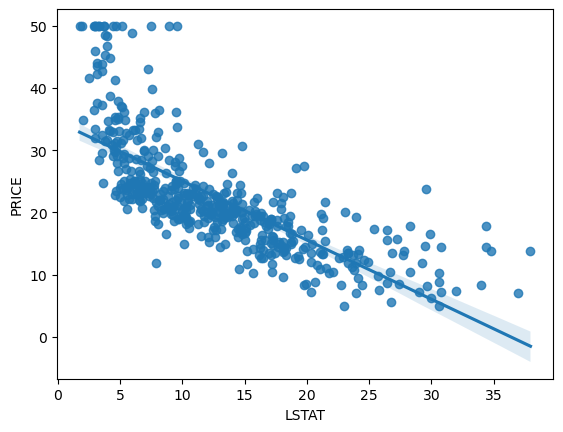

In [232]:
sbn.regplot(x= 'LSTAT', y = 'PRICE', data = boston_df)

In [233]:
X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

In [236]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

# Prepare data for training 

In [239]:
from sklearn.model_selection import train_test_split

In [241]:
# taking the default value for test train split 
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [243]:
X_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
425,15.86030,0.0,18.10,0.0,0.6790,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
183,0.10008,0.0,2.46,0.0,0.4880,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68
414,45.74610,0.0,18.10,0.0,0.6930,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
447,9.92485,0.0,18.10,0.0,0.7400,6.251,96.6,2.1980,24.0,666.0,20.2,388.52,16.44
503,0.06076,0.0,11.93,0.0,0.5730,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,14.33370,0.0,18.10,0.0,0.6140,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11
102,0.22876,0.0,8.56,0.0,0.5200,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
77,0.08707,0.0,12.83,0.0,0.4370,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01


In [245]:
from sklearn.preprocessing import StandardScaler

# instance
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [247]:
X_train

array([[ 1.2444339 , -0.4827211 ,  0.98673221, ...,  0.80417753,
        -3.90457297,  1.64539942],
       [-0.41000762, -0.4827211 , -1.25833421, ..., -0.29927681,
         0.44183222, -0.97302552],
       [ 4.38171933, -0.4827211 ,  0.98673221, ...,  0.80417753,
        -3.00462746,  3.40734329],
       ...,
       [-0.41137336, -0.4827211 ,  0.23024244, ...,  0.11451857,
         0.33083261, -0.33066473],
       [-0.41635551, -0.4827211 , -0.86645241, ...,  0.80417753,
         0.44183222, -0.64694695],
       [-0.41407963,  0.3784288 , -1.1334488 , ..., -1.63261747,
         0.22039135, -1.34668638]])

# Training the model 
- Using `sklearn`

In [250]:
from sklearn.linear_model import LinearRegression

In [252]:
linear_regression = LinearRegression()

In [254]:
linear_regression.fit(X_train,y_train)

LinearRegression()

# Prediction 

In [257]:
reg_predict = linear_regression.predict(X_test)

In [259]:
reg_predict

array([17.63661518, 25.32955717, 15.21137895, 35.68338089,  0.29875485,
       27.13144694, 28.64956579, 23.49378655, 30.50209607, 20.51190664,
       20.37774768, 33.14908706, 36.02040818, 37.19368777, 12.6146695 ,
       28.48688107, 23.4433625 , 18.15584885, 19.27872038, 41.07372142,
       19.98278858, 22.73151349, 26.09571936, 20.0989937 ,  9.14938989,
       22.43608425, 15.29753465, 22.73326904, 18.95300211, 18.33948681,
       19.50767016, 15.73169375, 20.90567959, 23.57591758, 15.01612526,
       23.36236247, 13.29652854, 26.07017151, 15.60422371, 14.97418388,
       27.3418075 , 22.52665019, 31.14627964,  9.18304607, 21.84094028,
       28.87824561, 13.72288595, 21.42958077, 22.97233409, 20.16271993,
       16.4511353 , 24.93973712, 38.3891856 , 26.78512831, 11.62132474,
        8.60298548, 20.41367492, 19.26230654, 17.79922156, 16.23317685,
       27.75143821, 24.61212054, 13.03151147, 28.59742209, 20.46889784,
       33.34989391, 34.19384868, 22.23170368, 30.91662838, 16.43

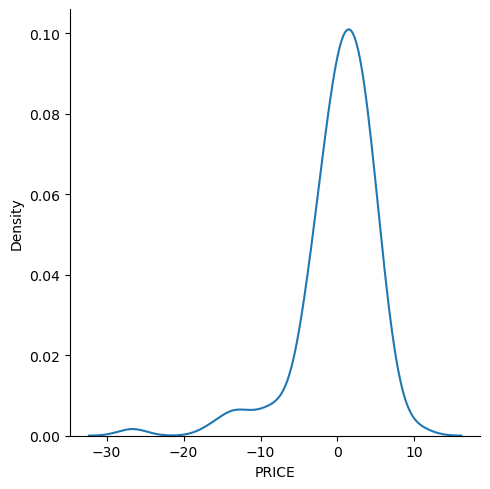

In [266]:
sbn.displot(reg_predict-y_test, kind='kde')

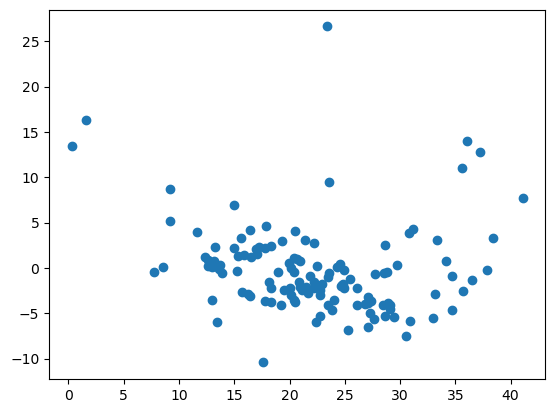

In [272]:
plt.scatter(reg_predict, y_test - reg_predict)

In [304]:
y_test_temp = y_test.array

In [312]:
from sklearn.metrics import root_mean_squared_error

error = root_mean_squared_error(y_test, reg_predict)

print(error)

4.9630965345720055


# Pickle the file to use it for further process

In [318]:
pickle.dump(reg_predict, open('reg_predict.pickle', 'wb'))